# This script convert graph dataset to adjacency matix and node vectors for machine learning

In [1]:

import sys
sys.path.append("../MIGraph/GraphConv/")
sys.path.append("../MIGraph/Encoders/")
import numpy as np
import pandas as pd
from tqdm import tqdm
import joblib
import warnings
from Config import Config
import glob
from ConvGraphScript import drawGraph
from PrepDataset import PrepDataset

%load_ext autoreload
%autoreload 2
    
warnings.filterwarnings('ignore')
CF=Config()

print("mode: ",CF.genre)
print("targetParamMode: ",CF.targetParamMode)

/home/kh/anaconda3/envs/chem/lib/python3.6/site-packages/chainer/_environment_check.py:73: UserWarning: 
--------------------------------------------------------------------------------
CuPy (cupy) version 6.0.0 may not be compatible with this version of Chainer.
Please consider installing the supported version by running:
  $ pip install 'cupy>=7.2.0,<8.0.0'

See the following page for more details:
  https://docs-cupy.chainer.org/en/latest/install.html
--------------------------------------------------------------------------------

  requirement=requirement, help=help))


mode:  ['V']
targetParamMode:  True


In [2]:
#init compound encoder
PD=PrepDataset()
allCompundsPath="praparingGraphs/output/allcompounds.csv.gz"

PD.setCompoundEncoder(allCompundsPath)

 32%|███▏      | 416/1308 [00:00<00:00, 4155.19it/s]

number of smiles:  1308
calculate fingerprints
error  nan
error  c1=cc=c[cH+]c=c1
error  [Cl-].[Cl-].[Zn2+]
error  [Na+].o=c(-c(=o)o1)o[Fe-3]123(oc(-c(=o)o2)=o)oc(-c(=o)o3)=o.[Na+].[Na+]
error  [O-2]=[Ce+4]=[O-2]
error  [H]1[BH]2[H][BH]3[BH]24[BH]1[H][BH]4[H]3
error  [K+].o=c(-c(=o)o1)o[Fe-3]123(oc(-c(=o)o2)=o)oc(-c(=o)o3)=o.[K+].[K+]
error  [Cd+2].[Cd+2].[Cd+2].[AsH6-3].[AsH6-3]
error  F[Si-2](F)(F)(F)(F)F.[NH4+].[NH4+]
error  [OH2][Re](=O)(=O)(=O)([OH2])O[Re](=O)(=O)=O
error  [Cl-].[Cl-].[Cu2+]
error  O=[Cl]=O
error  [Cl-].[Cl-].[Ni2+]


 65%|██████▌   | 854/1308 [00:00<00:00, 4218.15it/s]

error  [Cl-].[Cl-].[Cl-].[In3+]


100%|██████████| 1308/1308 [00:00<00:00, 4294.65it/s]


error  c1[nH]c2c(n1)c(=O)nc(n2)N
error  FCl(F)(F)(F)F
error  FBr(F)(F)(F)F
error  o=c([o-])C.[N+H4]
error  [Na+].[Na+].[Na+].[PH6-3]
error  FCl(=O)(=O)=O
error  B1([H]3)(C2CCCC1CCC2)[H]B34C2CCCC4CCC2
loading files
compressing and scaling


In [3]:
#load graph files
graphbinList=glob.glob("praparingGraphs/output/*.graphbin")
print(graphbinList)
graphbinList.sort(reverse=True)

for file in tqdm(graphbinList):
    print(file)
    gl=joblib.load(file)
    PD.graphList.extend(gl)

  0%|          | 0/2 [00:00<?, ?it/s]

['praparingGraphs/output/20190520wikipedia.graphbin', 'praparingGraphs/output/20200220PEDOTProcess.csv.graphbin']
praparingGraphs/output/20200220PEDOTProcess.csv.graphbin


100%|██████████| 2/2 [00:00<00:00,  4.55it/s]

praparingGraphs/output/20190520wikipedia.graphbin


load BERT encoder
1581


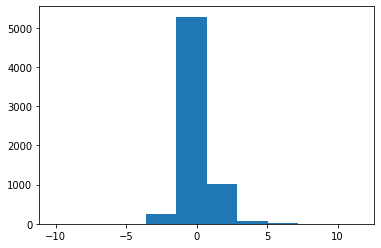

In [4]:
PD.setScaler()
print(len(PD.graphList))


# preparing problems
- in demo 1, only conducitvity was set as problems.
- on the other hand, other parametes, such as melting temperature, will be set as problems.
- see "self.targetParams" in Config.py to check what kind of parameters can be problems.

In [5]:
#prepare dataset

#parallel mode off
PD.parallel=False
trainDataset=PD.convToDataset(CF.genre,graphList=PD.graphList)


  4%|▎         | 59/1581 [00:00<00:05, 290.90it/s]

process  1581  graphs
converting graphs to vectors


100%|██████████| 1581/1581 [00:02<00:00, 777.98it/s] 
56it [00:00, 272.25it/s]

converting nodes to problems


1581it [00:03, 517.73it/s]
100%|██████████| 4001/4001 [00:01<00:00, 3424.06it/s]
4001it [00:00, 2027474.97it/s]


In [6]:

joblib.dump(trainDataset,"bin/traindataset.bin",compress=9)


['bin/traindataset.bin']

In [7]:
#see how converted...
trainDataset[0]

(array([[ 0.5273826 ,  0.9215451 , -0.9481316 , ..., -0.10286016,
         -0.6198921 ,  0.00931165],
        [ 0.52154136,  0.22977076, -0.40774637, ...,  0.18848634,
          0.18848634,  0.18848634],
        [ 0.52154136,  0.22977076, -0.40774637, ...,  0.38518208,
          0.38518208,  0.38518208],
        ...,
        [ 0.5273826 ,  0.9215451 , -0.9481316 , ..., -0.3035091 ,
         -0.26095045, -0.22768536],
        [ 0.5273826 ,  0.9215451 , -0.9481316 , ...,  0.21281011,
         -0.32839656,  0.69775283],
        [ 0.5273826 ,  0.9215451 , -0.9481316 , ..., -0.3035091 ,
         -0.26095045, -0.22768536]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([-1.1863406], dtype=float32),
 'electric conductivity')